Daniel Santiago Pardo Gomez

# Code Assigment 1

For this assignment you will use the following SVM implementation for classifying these datasets:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


# Detección de ocupación

**1)** Se trata de un problema de clasificación binaria, es decir, queremos predecir con ayuda de un modelo de aprendizaje de máquina si una habitación está ocupada o no. Para ello, tenemos datos de sensores que miden la temperatura, luminosidad y niveles de $CO_2$.


El conjunto de datos tiene 7 atributos:

* **Fecha y hora:** Momento en el que se tomó la medición.
* **Temperatura (°C):** Temperatura en grados Celsius.
*    **Humedad relativa (%):** Se refiere a la proporción entre la cantidad de vapor de agua en el aire y la cantidad máxima de vapor que soporta el aire en la temperatura actual.
*   ** Nivel de iluminación (Lux):** Cantidad de luz visible que llega a un área determinada.
*   ** Nivel de $CO_2$ (ppm):** Concentración de $CO_2$ en el aire.
*    **Ratio de humedad:** Razón entre la cantidad de vapor de agua y la cantidad de aire seco.

Los datos están etiquetados con 1 o 0, indicando si la habitación está ocupada o no.


In [63]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
from zipfile import ZipFile
import pandas as pd
import numpy as np


path='occupancy_data.zip'
files = ZipFile(path,'r').extractall('.')                           #Descomprimimos el archivo zip

data_test = pd.read_csv('datatest.txt', sep = ',', header=0)
data_test2 = pd.read_csv('datatest2.txt', sep = ',', header=0)
data_training = pd.read_csv('datatraining.txt', sep = ',', header=0)

data_test.columns

--2023-03-10 03:20:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335713 (328K) [application/x-httpd-php]
Saving to: ‘occupancy_data.zip.5’

occupancy_data.zip. 100%[===================>] 327.84K  --.-KB/s    in 0.1s    

2023-03-10 03:20:19 (2.87 MB/s) - ‘occupancy_data.zip.5’ saved [335713/335713]



Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [64]:
data_test=data_test.append(data_test2)

Tras obtener los datos, debemos realizar los siguientes ajustes:

  *  Reemplazar los valores en la columna "ocupación". Sabemos que un registro de una sala no ocupada está representado con 0; sin embargo, para utilizar el método de Support Vector Machine, el valor debe estar asociado a -1.

  *  Eliminar la columna de fecha y hora. Las medidas se tomaron cada minuto en un experimento controlado, por lo que no tiene sentido tener en cuenta esta información cuando queremos predecir nuevos datos.


In [65]:
rep=lambda x: x["Occupancy"].replace(0,-1) #Reemplazamos los valores de 0 por -1

data_test["Occupancy"], data_test2["Occupancy"], data_training["Occupancy"] = rep(data_test), rep(data_test2), rep(data_training)

In [66]:
rem = lambda x: x.loc[:,x.columns!='date']

data_test, data_test2, data_training = rem(data_test), rem(data_test2), rem(data_training)

In [67]:
#form = lambda x: x.groupby('Occupancy').apply(lambda x: np.delete(np.array(x),-1, axis=1)).to_dict()
form = lambda x: (np.array(x.loc[:, x.columns!="Occupancy"]),np.array(x["Occupancy"]))

X_testOcc, y_testOcc = form(data_test)
X_test2Occ, y_test2Occ = form(data_test2)
X_trainOcc, y_trainOcc = form(data_training)


# Detección de billetes falsos

**1)** Al igual que en el problema anterior, se trata de clasificación binaria. En este caso, se busca determinar si un billete es falso o no a través de características de imágenes en escala de grises con un tamaño de 400x400 píxeles.

**2)** El conjunto de datos cuenta con 4 atributos:

*    Varianza de la imagen transformada por Wavelet: Distancia media de los pixeles al promedio de pixeles.
*    Asimetría de la imagen transformada por Wavelet: Valor que indica la asimetría en el histograma de la distribución de probabilidad de los pixeles.
*    Curtosis de la imagen transformada por Wavelet: Medida estadística que indica la concentración del valor de los pixeles alrededor de la media.
*    Entropía de la imagen: Cantidad de información de la imagen, se calcula hallando la incertidumbre de la distribución de probabilidad de los pixeles.

La mayoría de las características del conjunto de datos involucran la imagen transformada por Wavelet. Esta transformación suele ser utilizada en el procesamiento de imágenes para descomponer la información de la imagen en señales de alta frecuencia (detalles pequeños) y señales de baja frecuencia (fronteras marcadas). A continuación, se puede ver un ejemplo de la transformada.

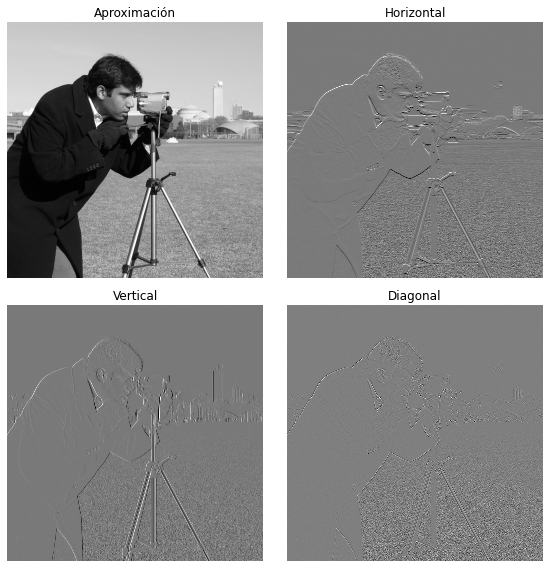

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import data

image = data.camera()
wavelet = 'haar'
coeffs = pywt.dwt2(image, wavelet)

# Extraer los coeficientes aproximados y detallados
cA, (cH, cV, cD) = coeffs

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(cA, cmap=plt.cm.gray)
ax[0].set_title('Aproximación')

ax[1].imshow(cH, cmap=plt.cm.gray)
ax[1].set_title('Horizontal')

ax[2].imshow(cV, cmap=plt.cm.gray)
ax[2].set_title('Vertical')

ax[3].imshow(cD, cmap=plt.cm.gray)
ax[3].set_title('Diagonal')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

3. 

In [69]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', sep = ',', header=None)

In [70]:
data.columns = ["variance", "skewness", "curtosis", "entropy", "class"]
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [71]:
data["class"]=data["class"].replace(0,-1)
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,-1
1,4.54590,8.16740,-2.4586,-1.46210,-1
2,3.86600,-2.63830,1.9242,0.10645,-1
3,3.45660,9.52280,-4.0112,-3.59440,-1
4,0.32924,-4.45520,4.5718,-0.98880,-1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [72]:
from sklearn.model_selection import train_test_split

X = data.drop('class', axis=1)  
y = data['class']             

X_trainBank, X_testBank, y_trainBank, y_testBank = map(np.array,train_test_split(X, y, test_size=0.2, random_state=42))

**3)** 

a) Para determinar si los datos son linealmente separables, podemos utilizar el algoritmo de perceptrón, que itera hasta lograr separar los datos mediante un hiperplano. Dado que en todo conjunto de datos pueden existir errores, podemos establecer una tolerancia del 2% para estos datos.

In [73]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [74]:
def perceptron_test(X_train, y_train):
  # Crear una instancia del clasificador Perceptron
  clf = Perceptron()

  # Entrenar el modelo con el conjunto de datos de entrenamiento
  clf.fit(X_train, y_train)
  score = clf.score(X_train, y_train)
  print("El algoritmo tuvó una exactitud de ",score)

  # Verifica si cumple nuestra tolerancia
  if clf.score(X_train, y_train) <= 9.8:
      print("El conjunto de datos es linealmente separable.")
      return True
  else:
      print("El conjunto de datos no es linealmente separable.")
      return False 


In [75]:
perceptron_test(X_trainBank,y_trainBank)

El algoritmo tuvó una exactitud de  0.96718322698268
El conjunto de datos es linealmente separable.


True

In [76]:
perceptron_test(X_trainOcc,y_trainOcc)

El algoritmo tuvó una exactitud de  0.9815792705391133
El conjunto de datos es linealmente separable.


True

Por lo tanto, los datos son linealmente separables.

b) En el caso del dataset de ocupación de una habitación, los datos fueron obtenidos cada minuto durante algunas semanas en un edificio de oficinas, por lo que podemos considerar que es una muestra representativa del experimento a predecir. Por otro lado, no tenemos mucha información acerca de la selección de las imágenes de los billetes auténticos y falsos de las que se tomaron los datos. Sin embargo, es difícil determinar si los datos presentan algún tipo de sesgo.

c) Los conjuntos de datos tienen 20560 y 1372 registros, respectivamente. Este número de instancias puede considerarse lo suficientemente grande para este tipo de análisis. Sin embargo, no es suficiente tener una gran cantidad de datos para garantizar la generalización del modelo, ya que también debemos considerar la variabilidad en los datos, la relación entre los atributos o características registradas, la complejidad del problema, entre otros factores.

**4)** El código es una versión básica de support vector machine, cuyo objetivo es encontrar una función lineal que divida dos clases de datos representados como elementos en $\mathbb{R}^n$, maximizando el margen entre las clases.

Para lograrlo, se utiliza la función de pérdida de Hinge, la cual viene dada por:
$$f(x)=\max{0,1-t}$$
donde $t=y(w^Tx + b)$, de tal manera que la función aumentará cuando los errores sean mayores.

Para minimizar esta función de costo, se utiliza el método de optimización numérica del gradiente descendente por lotes. En resumen, este algoritmo calcula el gradiente de la función de pérdida con respecto a una porción de los datos de tamaño fijo y actualiza los pesos moviéndose en dirección contraria al gradiente.



In [77]:
# Tomado de: https://www.pycodemates.com/2022/10/implementing-SVM-from-scratch-in-python.html 
import numpy as np

class SVM:

    def __init__(self, C = 1.0):
        
        self.C = C #factor del error
        self.w = 0
        self.b = 0

    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            opt_term = y[i] * ((np.dot(w, x[i])) + b)
            loss = reg + self.C * max(0, 1-opt_term)

            # Calculo de la pérdida
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
       
        number_of_features = X.shape[1]
        number_of_samples = X.shape[0]
        c = self.C

        ids = np.arange(number_of_samples)

        # Se reordenan los datos de manera aleatoria para 
        # tener lotes 'mejor' distribuidos
        np.random.shuffle(ids)

        
        w = np.zeros((1, number_of_features)) # Pesos
        b = 0                                 # Desplazamiento
        losses = []

        # Gradiente descendiente
        for i in range(epochs):
         
            l = self.hingeloss(w, b, X, Y)
            losses.append(l)
            
            # Iteración por lote
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculo de los gradientes

                            gradw += c * Y[x] * X[x]
                            gradb += c * Y[x]

                # Actualización de los pesos
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)

**5)** Probemos el algoritmo sobre los dos conjuntos de datos tomando muestras aleatorias de los registros:

In [78]:
svmOcc= SVM()
svmOcc.fit(X_trainOcc, y_trainOcc);

In [79]:
import random

testOcc=pd.DataFrame(X_testOcc)
testOcc.columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
testOcc["Predicted Occ"]=svmOcc.predict(X_testOcc)
testOcc["Real Occ"]=y_testOcc
testOcc.sample(20)

,Temperature,Humidity,Light,CO2,HumidityRatio,Predicted Occ,Real Occ
9026,20.290000,28.790000,0.000000,786.000000,0.004237,-1.0,-1
2389,20.600000,24.200000,0.000000,463.500000,0.003627,-1.0,-1
2236,20.700000,24.700000,0.000000,479.000000,0.003725,-1.0,-1
8173,22.000000,28.890000,169.333333,636.666667,0.004726,-1.0,-1
8125,21.600000,28.890000,204.333333,633.666667,0.004611,-1.0,-1
8645,20.500000,32.790000,0.000000,677.000000,0.004893,-1.0,-1
5333,23.650000,25.390000,779.000000,705.500000,0.004589,1.0,1
157,22.600000,25.200000,439.800000,860.600000,0.004272,1.0,1
794,20.500000,22.390000,0.000000,434.000000,0.003333,-1.0,-1
3357,20.600000,25.393333,0.000000,552.333333,0.003806,-1.0,-1


In [80]:
svmBank= SVM()
svmBank.fit(X_trainBank, y_trainBank);

In [81]:
import random

testBank=pd.DataFrame(X_testBank)
testBank.columns = ["variance", "skewness", "curtosis", "entropy"]
testBank["Predicted Class"]=svmBank.predict(X_testBank)
testBank["Real Class"]=y_testBank
testBank.sample(20)

,variance,skewness,curtosis,entropy,Predicted Class,Real Class
102,0.39559,6.886600,1.058800,-0.67587,-1.0,-1
81,1.79390,-1.117400,1.545400,-0.26079,-1.0,-1
134,3.84170,10.021500,-4.269900,-4.91590,-1.0,-1
98,2.39520,9.508300,-3.178300,-3.00860,-1.0,-1
166,-3.39240,3.356400,-0.720040,-3.52330,1.0,1
184,-1.83870,-6.301000,5.650600,0.19567,1.0,1
135,3.13770,-4.109600,4.570100,0.98963,-1.0,-1
255,4.02150,-2.191400,2.464800,1.14090,-1.0,-1
7,5.17310,3.960600,-1.983000,0.40774,-1.0,-1
206,-6.52350,9.601400,-0.253920,-6.96420,1.0,1


**6)** Para verificar evaluar un modelo existen diferentes métricas, en este caso vamos a utilizar las siguientes:
* **Accuracy score:** Expresa la proporcion de predicciones correctas:  $$\frac{\textit{predicciones correctas}}{\textit{predicciones totales}}$$
* **Precision score:** Es la proporción de verdaderos positivos y todas las instancias predecidas como positivas $$\frac{\textit{verdaderos positivos}}{\textit{verdaderos positivos}+\textit{falsos positivos}}$$
* **Recall score:** Proporción entre verdaderos positivos y todas las instancias positivas$$\frac{\textit{verdaderos positivos}}{\textit{verdaderos positivos}+\textit{falsos negativos}}$$
Podemos usar una métrica u otra dependiendo del coste que implique un falso positivo o un falso negativo.

In [82]:
corr=sum(testBank["Predicted Class"]==testBank["Real Class"])
total=len(testBank)

tp=sum((testBank["Predicted Class"]==testBank["Real Class"]) & (testBank["Real Class"]==1) ) # Verdaderos positivos

fp=sum((testBank["Predicted Class"]==1) & (testBank["Real Class"]==-1) ) # Falsos positivos
fn=sum((testBank["Predicted Class"]==-1) & (testBank["Real Class"]==1) ) # Falsos negativos

print('Accuracy score:',corr/total )
print('Precision score:',tp/(tp+fp) )
print('Recall score:',tp/(tp+fn) )

Accuracy score: 0.9890909090909091
Precision score: 0.984375
Recall score: 0.9921259842519685


In [83]:
corr=sum(testOcc["Predicted Occ"]==testOcc["Real Occ"])
total=len(testOcc)

tp=sum((testOcc["Predicted Occ"]==testOcc["Real Occ"]) & (testOcc["Real Occ"]==1) ) # Verdaderos positivos

fp=sum((testOcc["Predicted Occ"]==1) & (testOcc["Real Occ"]==-1) ) # Falsos positivos
fn=sum((testOcc["Predicted Occ"]==-1) & (testOcc["Real Occ"]==1) ) # Falsos negativos


print('Accuracy score:',corr/total )
print('Precision score:',tp/(tp+fp) )
print('Recall score:',tp/(tp+fn) )

Accuracy score: 0.9887251348957075
Precision score: 0.9591966847306344
Recall score: 0.9960278053624627
